Import dependencies

In [1]:
import numpy as np
import pandas as pd
import pylab as plb

1. The data set that you need is in one of the sheets of the Excel file Assignment_1_Data_and_Template.xlsx (attached). The other sheets contain shaded cells meant to be filled in by you. Examine the sheets carefully and understand what must be computed or described. Except for cutting and pasting your results in the specific cells provided, do not alter the spreadsheet in any other way. This is the only recognized means of submitting this assignment.

In [4]:
# Import data into Panda.DataFrame
df = pd.read_excel('Assignment_1_Data_and_Template.xlsx')

# adding head_parameter to truncate data to top 50 rows
# df = df.head(n=50)

# Filter out data for Male and Female data
male_heights = df.loc[df['Gender'] == 'Male']
female_heights = df.loc[df['Gender'] == 'Female']

# Convert heights in feet and inches to inches only
male_ht = male_heights['Height_Feet'] * 12 + male_heights['Height_Inches']
female_ht = female_heights['Height_Feet'] * 12 + female_heights['Height_Inches']

2. Construct separate histograms for male and female heights using 32 bins. Do not use a built in histogram program. Also remember that the histograms are the 2 lists of 32 counts that you enter into the correct place in the spreadsheet. They are not just pretty pictures!

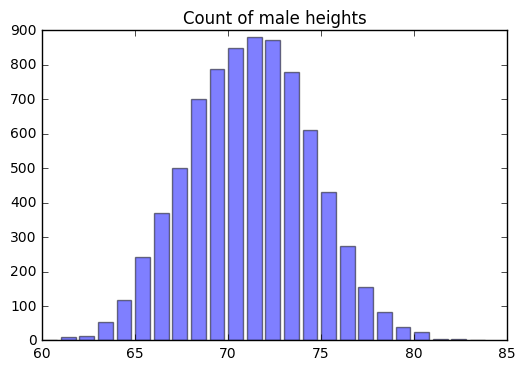

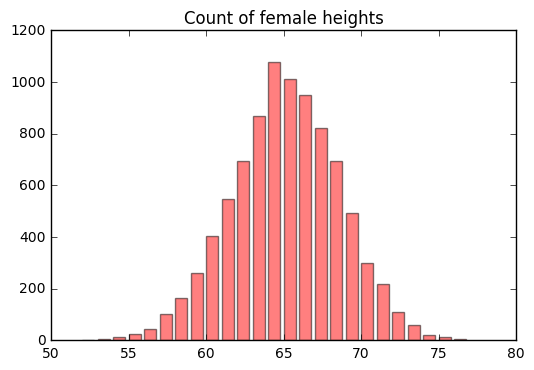

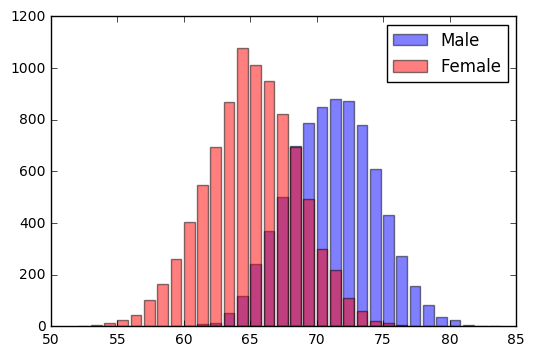

In [5]:
bins = 32

# Determine bin widths based on maximum of each data set
female_bin_width = np.ceil((female_ht.max() - female_ht.min()) / bins)
male_bin_width = np.ceil((male_ht.max() - male_ht.min()) / bins)

# Determine how many data points fall within each bin
f = female_ht.value_counts()
m = male_ht.value_counts()

# Graph in separate histograms
plb.clf()
m_plot = plb.bar(m.axes[0], m.tolist(), color='b', alpha=0.5, hold=None)
plb.title('Count of male heights')
plb.show()

plb.clf()
f_plot = plb.bar(f.axes[0], f.tolist(), color='r', alpha=0.5, hold=None)
plb.title('Count of female heights')
plb.show()

# Graph in the same histogram
plb.clf()
m_plot = plb.bar(m.axes[0], m.tolist(), color='b', alpha=0.5, hold=True)
f_plot = plb.bar(f.axes[0], f.tolist(), color='r', alpha=0.5, hold=True)
plb.legend([m_plot, f_plot], ['Male', 'Female'])
plb.show()

3. Based on the histograms, compute the probability of being female of individuals with heights 55, 60, 65, 70, 75 and 80 inches

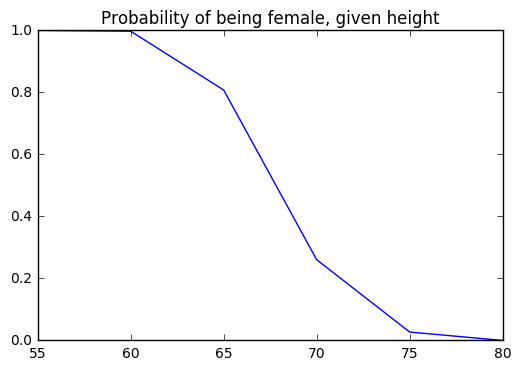

In [6]:
# Female probable heights
prob_hts = [55, 60, 65, 70, 75, 80]

# Empty array to comput probability of being female
# Probability = number of females @ height / (number of females @ height + number of males @ height)
prob = []
for item in prob_hts:
    probability = 0
    try:
        probability = m[item]
    except:
        probability = 0
        
    try:
        probability = f[item]/(f[item]+probability)
    except:
        probability = 0
        
    prob.append(probability)
    
plb.plot(prob_hts, prob)
plb.title('Probability of being female, given height')
plb.show()

4. Find the parameters of Gaussian models for the 2 PDFs to describe the data. You may use built in functions to compute the model parameters.

In [7]:
# Function to compute pdf for female
def pdf(x): 
    # input: x = height in inches
    mean = female_ht.mean()
    std = female_ht.std()
    total = len(female_ht)
    
    total_f = total / (np.sqrt(2*np.pi)*std) * np.exp(-0.5 * (((x-mean)/std) ** 2))
    
    mean = male_ht.mean()
    std = male_ht.std()
    total = len(male_ht)
    
    total_m = total / (np.sqrt(2*np.pi)*std) * np.exp(-0.5 * (((x-mean)/std) ** 2))
    
    return total_f / (total_m + total_f)

5. Use the Bayesian Formula with the model parameters found above to re-compute the probability of being female of individuals with heights 55, 60, 65, 70, 75 and 80 inches. Do not use a built in function for computing the pdf.

In [8]:
pdf_hts = []
for item in prob_hts:
    pdf_hts.append(pdf(item))

6. Repeat steps 2 through 5 using just the first 50 height entries in the data file. Now what are your observations regarding histogram classifiers and Bayesian classifiers?

With full data, Bayesian classifier and histogram classifiers produce nearly the same result.
However, with partial data, Bayesian classifier produces nearly identical results as the Bayesian classifier with full data.
With partial data, the histogram classifier was inaccurate because it only looks at one value. When the data is sparse and that value doesn't exist, the histogram classifier determines that the probability is 0, which is inaccurate.
It seems that the Bayesian classifier is more accurate and consistent than the histogram classifier, whether it is with full data or partial data.